# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
df=pd.read_csv(r"C:\Users\Aj\Downloads\Data sets decodr\data.csv")

# Displaying data

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.tail()

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


# Checking size of data

In [5]:
df.shape

(2227, 3)

# Checking Various datatypes in data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# Checking statistical information of the data

In [7]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


# Checking missing values

In [8]:
df.isnull()

,x1,x2,y
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2222,False,False,False
2223,False,False,False
2224,False,False,False
2225,False,False,False


In [9]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

# checking unique values

In [10]:
df.nunique()

x1    1887
x2    1884
y        2
dtype: int64

In [11]:
df.min()

x1   -134.369160
x2   -134.876132
y       0.000000
dtype: float64

In [12]:
df.max()

x1    1.345087e+02
x2    1.000000e+08
y     1.000000e+00
dtype: float64

# Visualising the data

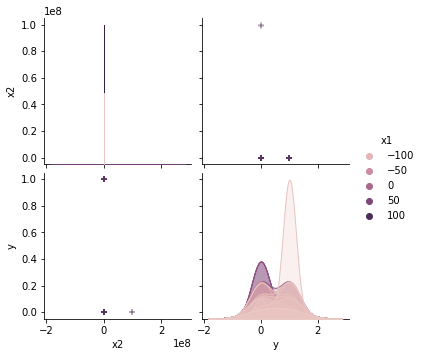

In [28]:
a=sns.pairplot(df,hue='x1',markers='+')
plt.show()

<AxesSubplot:>

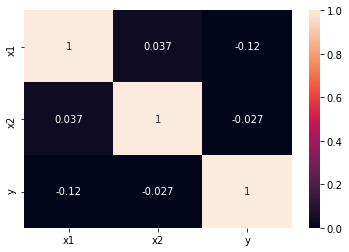

In [14]:
#Correlation between features
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1)

In [15]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# Creating the model

In [16]:
from sklearn.model_selection import train_test_split
s = ["x1","x2"]
df = df.dropna()
x = df[s].values
y = df['y']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1775, 2)
(444, 2)
(1775,)
(444,)


# LOGISTIC REGRESSION

In [19]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [20]:
#Importing Classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Making predictions
y_pred = classifier.predict(x_test)

#Printing Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       242
           1       0.53      0.28      0.37       202

    accuracy                           0.56       444
   macro avg       0.55      0.54      0.52       444
weighted avg       0.55      0.56      0.53       444



In [21]:
print(confusion_matrix(y_test,y_pred))

[[192  50]
 [145  57]]


In [22]:
print(accuracy_score(y_test,y_pred))

0.5608108108108109


# SVM with RBF Kernel

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)
classifier.fit(x_train, y_train)

SVC(C=0.1, gamma=0.1)

In [24]:
#Importing Classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Making predictions
y_pred = classifier.predict(x_test)

#Printing Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       242
           1       0.00      0.00      0.00       202

    accuracy                           0.55       444
   macro avg       0.27      0.50      0.35       444
weighted avg       0.30      0.55      0.38       444



In [25]:
print(confusion_matrix(y_test,y_pred))

[[242   0]
 [202   0]]


In [89]:
print(accuracy_score(y_test,y_pred))

0.5427927927927928


# SVM with Linear Kernel


In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1)
classifier.fit(x_train, y_train)
#from sklearn.svm import SVC
#svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)

SVC(C=1, kernel='linear')

In [38]:
#Importing Classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Making predictions
y_pred = classifier.predict(x_test)

#Printing Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       242
           1       0.00      0.00      0.00       202

    accuracy                           0.54       444
   macro avg       0.27      0.50      0.35       444
weighted avg       0.30      0.54      0.38       444



In [39]:
print(confusion_matrix(y_test,y_pred))

[[241   1]
 [202   0]]


In [90]:
print(accuracy_score(y_test,y_pred))

0.5427927927927928


# Decision Tree

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [56]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt_default=DecisionTreeClassifier(max_depth=15)

In [59]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [60]:
#Fiting on Train data
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

In [62]:
#Making predictions
y_pred_default=dt_default.predict(x_test)

In [63]:
#Printing classification report 
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       242
           1       0.90      0.94      0.92       202

    accuracy                           0.93       444
   macro avg       0.92      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



In [64]:
#Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[221  21]
 [ 12 190]]


In [65]:
#Printing accuracy score
print(accuracy_score(y_test,y_pred_default))

0.9256756756756757


# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=4)
knn

KNeighborsClassifier(n_neighbors=4)

In [69]:
knn.fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [71]:
knn.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [72]:
x_test_predicted = knn.predict(x_test)
x_test_predicted

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [73]:
from sklearn import metrics

In [75]:
# Training Accuracy:
metrics.accuracy_score(y_train, knn.predict(x_train))

0.7087323943661972

In [77]:
# Test Accuracy:
metrics.accuracy_score(y_test, x_test_predicted)

0.5247747747747747

# Build a Knn model with various K value and Decide the best K value

In [79]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    
    # storing the mean and std in a list
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5990991 , 0.5472973 , 0.52252252, 0.52477477, 0.51576577,
       0.52027027, 0.50675676, 0.52027027, 0.52702703, 0.55405405,
       0.55405405, 0.55405405, 0.5472973 , 0.54954955, 0.54279279,
       0.53378378, 0.53603604, 0.53603604, 0.53378378, 0.5472973 ,
       0.52927928, 0.53603604, 0.52252252, 0.52477477, 0.53153153,
       0.52927928, 0.52702703, 0.52702703, 0.53378378])

# Plot model accuracy for Different number of Neighbors

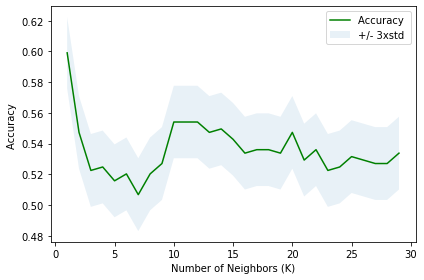

In [80]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [82]:
# With best value of K
knn = KNeighborsClassifier(n_neighbors=29).fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=29)

In [83]:
x_test_predicted = knn.predict(x_test)
x_test_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [87]:
print(confusion_matrix(y_test, x_test_predicted))

[[155  87]
 [120  82]]


In [88]:
print(classification_report(y_test, x_test_predicted))
# Recall: Out of all the Actual Positive Class, how many were Predicted as Actuals
# Precision: Out of all the Predicted Positive Class, how many are Actually Positive.

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       242
           1       0.49      0.41      0.44       202

    accuracy                           0.53       444
   macro avg       0.52      0.52      0.52       444
weighted avg       0.53      0.53      0.53       444



In [91]:
print(accuracy_score(y_test,y_pred))

0.5427927927927928


In [92]:
#Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set.A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

#Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). In Decision Trees, for predicting a class label for a record we start from the root of the tree.

#Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes

#Radial basis function kernel,is a popular kernel function used in various kernelized learning algorithms.

#K-Nearest Neighbors (KNN) is a standard machine-learning method that has been extended to large-scale data mining efforts. The idea is that one uses a large amount of training data, where each data point is characterized by a set of variables.

#On comparing the accuracy scores, we can see that the decission tree performed better on the current dataset.

#on comparing the  weighted average ,we can see that decission tree performed better.

#We can see the difference in confusion matrix as well.

In [ ]:
From the observation i can say that Decission tree preformed better.